In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
IRLdata = []
outputs = []
residuals = []
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv("/content/drive/My Drive/Data/us 21.csv")
#Adjusted 21-day us data from 6/30 to 7/21! Fresh and new -Sarah

for i in range(len(data.cases)):
  IRLdata.insert(i, data.cases[i])

data

,date,cases,deaths
0,2020/7/1,2703296,128104
1,2020/7/2,2758851,128827
2,2020/7/3,2815374,129417
3,2020/7/4,2866014,129679
4,2020/7/5,2910780,129941
5,2020/7/6,2958095,130332
6,2020/7/7,3012252,131290
7,2020/7/8,3071711,132238
8,2020/7/9,3131610,133079
9,2020/7/10,3199837,133907


In [3]:
predictions = pd.read_csv("/content/drive/My Drive/Data/21 Exponential_Predictions.csv")
predictions = predictions.head(21)
#The line above: Due to some formating, there were many redundent rows in
#the inital file, so, when using, please just select the first 31 rows -Sarah
for i in range(len(predictions.cases)):
  outputs.insert(i, predictions.cases[i])

predictions

,date,cases
0,2020/7/1,78600000.0
1,2020/7/2,86700000.0
2,2020/7/3,95700000.0
3,2020/7/4,106000000.0
4,2020/7/5,117000000.0
5,2020/7/6,129000000.0
6,2020/7/7,142000000.0
7,2020/7/8,157000000.0
8,2020/7/9,173000000.0
9,2020/7/10,191000000.0


In [4]:
print(outputs)
print("length of outputs: "+ str(len(outputs)))
print("length of IRLdata "+ str(len(IRLdata)))

[78600000.0, 86700000.0, 95700000.0, 106000000.0, 117000000.0, 129000000.0, 142000000.0, 157000000.0, 173000000.0, 191000000.0, 211000000.0, 233000000.0, 257000000.0, 284000000.0, 314000000.0, 346000000.0, 382000000.0, 422000000.0, 466000000.0, 514000000.0, 568000000.0]
length of outputs: 21
length of IRLdata 21


In [6]:
rms = sqrt(mean_squared_error(IRLdata, outputs))
print(rms)

287094888.2221756


In [ ]:
def calcResiduals(y_i, y): 
  r_i = y_i - y #r_i = ith residual, y_i = ith y value, y = predicted y value
  return r_i

In [ ]:
def calcRMSD():
  Rsquared = []
  sum = 0

  for x in range(len(residuals)):
    Rsquared.insert(x,residuals[x]*residuals[x])

    for x in range(len(Rsquared)):
      sum += Rsquared[x]

  MSD = sum/(len(Rsquared))
  RMSD = math.sqrt(MSD)

  return RMSD

In [ ]:
for x in range (len(IRLdata)):
  residual = calcResiduals(IRLdata[x], outputs[x])
  residuals.insert(x,residual)

print("residuals: "+ str(residuals))
print("RMSD: "+str(calcRMSD()))

residuals: [-75896704.0, -83941149.0, -92884626.0, -103133986.0, -114089220.0, -126041905.0, -138987748.0, -153928289.0, -169868390.0, -187800163.0, -207739435.0, -229681628.0, -253620057.0, -280554456.0, -310486108.0, -342410411.0, -378339488.0, -418277034.0, -462214759.0, -510154876.0, -564089602.0]
RMSD: 654539090.0312095


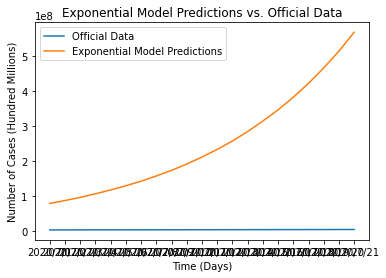

In [ ]:
x = data.date 
#Will actual dates work? As shown in the generated graph, 
#the time is not very well-defined...? -Sarah
y1 = data.cases
y2 = predictions.cases

plt.plot(x, y1, label="Official Data")
plt.plot(x, y2, label="Exponential Model Predictions")

plt.xlabel("Time (Days)")
plt.ylabel("Number of Cases (Hundred Millions)")
#The graph is right! Just a problem with units-it's counted in 10^8
#so the unit should be hundred millions -Sarah
plt.title("Exponential Model Predictions vs. Official Data")

plt.legend()
plt.show()